# Imporitng Libraries 

In [1]:
# Step 1: Import Libraries
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Imporitng Dataset & Loading It

In [2]:
# Step 2: Dataset Preparation
# Dataset is already attached in Kaggle as an input. Define paths.
input_dir = "/kaggle/input/masked-face-age-and-gender-identify-artificial-masking/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Datset of Artificial Masked - 224x224 Dimesion images"
organized_dir = "/kaggle/working/organized_dataset"


In [4]:
def organize_dataset(source_dir, target_dir):
    """Organize dataset into folders based on age and gender."""
    os.makedirs(target_dir, exist_ok=True)
    for filename in os.listdir(source_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            parts = filename.split("_")
            if len(parts) >= 2:
                folder_name = f"{parts[0]}_{parts[1]}"
                folder_path = os.path.join(target_dir, folder_name)
                os.makedirs(folder_path, exist_ok=True)
                shutil.copy(os.path.join(source_dir, filename), folder_path)

# Organize dataset
organize_dataset(input_dir, organized_dir)
print("Dataset organized successfully!")

Dataset organized successfully!


In [5]:
import os
import shutil
import random

# Set paths for dataset and split directories
source_dir = "/kaggle/input/masked-face-age-and-gender-identify-artificial-masking/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Dataset of Artificial Maksed Original - 200X200 Dimension images"
split_dir = "/kaggle/working/split_dataset"
train_dir = os.path.join(split_dir, "train")
val_dir = os.path.join(split_dir, "val")
test_dir = os.path.join(split_dir, "test")

# Create target directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split dataset into train, validation, and test sets
def split_dataset(source_dir, train_dir, val_dir, test_dir, val_size=0.1, test_size=0.1):
    # Iterate through the folders inside the source directory
    for class_folder in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_folder)
        
        if os.path.isdir(class_path):
            # Create class-specific directories in train, val, and test
            os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)
            os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
            
            # List all image files in the class folder
            all_images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png'))]
            
            # Shuffle images and split them
            random.shuffle(all_images)
            total_images = len(all_images)
            val_images = all_images[:int(val_size * total_images)]
            test_images = all_images[int(val_size * total_images):int((val_size + test_size) * total_images)]
            train_images = all_images[int((val_size + test_size) * total_images):]
            
            # Move the images to the respective folders
            for image in train_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_folder, image))
            for image in val_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_folder, image))
            for image in test_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_folder, image))

# Split the dataset
split_dataset(source_dir, train_dir, val_dir, test_dir)

print("Dataset split into train, validation, and test sets successfully!")


Dataset split into train, validation, and test sets successfully!


In [6]:
# Step 1: Import Libraries
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Step 2: Dataset Preparation
train_dir = '/kaggle/working/split_dataset/train'
val_dir = '/kaggle/working/split_dataset/val'
test_dir = '/kaggle/working/split_dataset/test'

# Check if directories exist
assert os.path.exists(train_dir), f"Training directory '{train_dir}' does not exist."
assert os.path.exists(val_dir), f"Validation directory '{val_dir}' does not exist."
assert os.path.exists(test_dir), f"Test directory '{test_dir}' does not exist."

print("All dataset directories verified.")

# Step 3: Data Preprocessing with Enhanced ImageDataGenerator

# Advanced ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    rotation_range=45,  # Random rotations
    width_shift_range=0.3,  # Random horizontal shifts
    height_shift_range=0.3,  # Random vertical shifts
    shear_range=0.3,  # Random shear transformations
    zoom_range=0.3, 
    brightness_range=[0.9, 1.3],# Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest',  # Fill pixels after transformations
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Only rescale the validation set
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Only rescale the test set
)

# Generators for training, validation, and test sets
print("\nCreating training data generator...")
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 128x128
    batch_size=32,  # Adjust batch size based on memory and performance
    class_mode="categorical",  # Categorical for classification
    shuffle=True  # Shuffle data for better training
)

print("\nCreating validation data generator...")
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Shuffle validation data
)

print("\nCreating test data generator...")
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # No shuffle for test data, ensures correct evaluation
)

# Additional logging
print(f"\nTraining data classes: {train_gen.class_indices}")
print(f"Number of classes detected: {len(train_gen.class_indices)}")
print("\n\nData generators created successfully.")

# Verify the number of samples in each generator
print(f"Number of training samples: {train_gen.samples}")
print(f"Number of validation samples: {val_gen.samples}")
print(f"Number of test samples: {test_gen.samples}")

# Ensure batch sizes are consistent
assert train_gen.batch_size == 32, "Unexpected training batch size."
assert val_gen.batch_size == 32, "Unexpected validation batch size."
assert test_gen.batch_size == 32, "Unexpected test batch size."

print("\n\nBatch size checks passed.")


All dataset directories verified.

Creating training data generator...
Found 9734 images belonging to 16 classes.

Creating validation data generator...
Found 1210 images belonging to 16 classes.

Creating test data generator...
Found 1216 images belonging to 16 classes.

Training data classes: {'(0-10)_Female': 0, '(0-10)_Male': 1, '(11-20)_Female': 2, '(11-20)_Male': 3, '(21-30)_Female': 4, '(21-30)_Male': 5, '(31-40)_Female': 6, '(31-40)_Male': 7, '(41-50)_Female': 8, '(41-50)_Male': 9, '(51-60)_Female': 10, '(51-60)_Male': 11, '(61-70)_Female': 12, '(61-70)_Male': 13, '(71-80)_Female': 14, '(71-80)_Male': 15}
Number of classes detected: 16


Data generators created successfully.
Number of training samples: 9734
Number of validation samples: 1210
Number of test samples: 1216


Batch size checks passed.


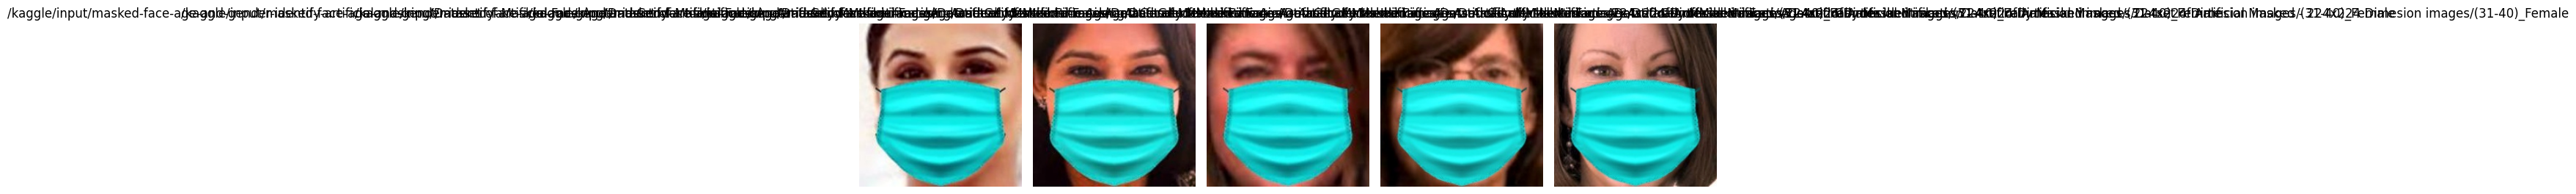

In [15]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define dataset path
dataset_path = "/kaggle/input/masked-face-age-and-gender-identify-artificial-masking/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Datset of Artificial Masked - 224x224 Dimesion images"

# Define classes
classes = [
    "0-10_Female", "0-10_Male", "11-20_Female", "11-20_Male",
    "21-30_Female", "21-30_Male", "31-40_Female", "31-40_Male",
    "41-50_Female", "41-50_Male", "51-60_Female", "51-60_Male",
    "61-70_Female", "61-70_Male", "71-80_Female", "71-80_Male"
]

# Visualize some images from the dataset
def visualize_images(class_name, num_images=5):
    """
    Visualize images from a given class.
    
    Args:
    - class_name (str): Class folder name to visualize images from.
    - num_images (int): Number of images to display.
    """
    class_folder = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder)[:num_images]
    
    plt.figure(figsize=(12, 8))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_folder, img_file)
        img = load_img(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.tight_layout()
    plt.show()

# Example: Visualize images from the "21-30_Female" class
visualize_images("/kaggle/input/masked-face-age-and-gender-identify-artificial-masking/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Dataset of Masked Face Age and Gender Identification - Artifically Masked images/Datset of Artificial Masked - 224x224 Dimesion images/(31-40)_Female")


In [7]:
for images, labels in train_gen:
    print(labels[:5])  # Print first 5 labels to confirm
    break


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to build the DenseNet model
def build_densenet_model(input_shape=(224, 224, 3), num_classes=16, weights_path=None):
    # Load the DenseNet121 model without the top layers (pre-trained weights will not be used)
    base_model = DenseNet121(weights=None, include_top=False, input_shape=input_shape)
    
    # Load custom weights if provided and if the file exists
    if weights_path and os.path.exists(weights_path):
        print(f"Loading custom weights from: {weights_path}")
        base_model.load_weights(weights_path, skip_mismatch=True)
    else:
        print("No custom weights provided or file not found.")
    
    # Freeze the initial layers for fine-tuning, and unfreeze later layers if needed
    for layer in base_model.layers[:100]:  # Unfreeze last 100 layers
        layer.trainable = False
    for layer in base_model.layers[100:]:
        layer.trainable = True
    
    # Define input layer
    inputs = Input(shape=input_shape, name="image_input")
    
    # Pass through DenseNet base model
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    
    # Add custom dense layers
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128)(x)
    x = LeakyReLU(negative_slope=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Output layer for multi-class classification
    output = Dense(num_classes, activation='softmax', name="class_output")(x)  # Softmax for multi-class
    
    # Define the full model
    model = Model(inputs=inputs, outputs=output)
    
    # Return the model
    return model

# Path to the custom weights file (your custom-trained weights from Kaggle dataset)
weights_path = '/kaggle/input/densenet/keras/densenet121_imagenet/2/model.weights.h5'

# Number of classes (16 age groups: e.g., (0-10)_Female, (0-10)_Male, ..., (71-80)_Male)
num_classes = 16

# Build the model
input_shape = (224, 224, 3)
model = build_densenet_model(input_shape=input_shape, num_classes=num_classes, weights_path=weights_path)

# Print the model summary to check the architecture
model.summary()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def calculate_class_weights(y_train, class_labels):
    # Compute class weights
    weights = compute_class_weight(
        class_weight='balanced',
        classes=class_labels,
        y=y_train
    )
    return dict(enumerate(weights))

# Example usage:
# Assuming `train_gen` is a generator that yields batches with labels.
# Extract labels from training data generator.
labels = train_gen.classes  # Replace with the attribute/method for your generator
class_labels = np.unique(labels)  # Extract unique class labels

# Compute class weights
class_weights = calculate_class_weights(labels, class_labels)

# Print class weights for verification
print("Computed Class Weights:", class_weights)


In [8]:
import tensorflow as tf
from tensorflow.keras import backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', num_classes=None, average='macro', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.average = average
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert one-hot encoded labels to class indices
        y_true = tf.argmax(y_true, axis=1)
        y_pred = tf.argmax(y_pred, axis=1)
        
        # Update true positives, false positives, and false negatives
        self.true_positives.assign_add(tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), self.dtype)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(tf.logical_and(tf.not_equal(y_true, y_pred), tf.equal(y_pred, 1)), self.dtype)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(tf.logical_and(tf.not_equal(y_true, y_pred), tf.equal(y_true, 1)), self.dtype)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
        f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

        if self.average == 'macro':
            return tf.reduce_mean(f1_score)  # Macro average F1 score
        elif self.average == 'weighted':
            # Weighted F1 score can be implemented based on class distribution
            return f1_score  # Placeholder for weighted implementation
        else:
            return f1_score  # Return as-is for individual class F1

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)




In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import AUC, Precision



# Compile the model with specified optimizer, loss, and metrics
optimizer = Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.AUC(name='train_auc'),                  # For training phase
        F1Score(num_classes=num_classes, name='train_f1', average='macro'),
        tf.keras.metrics.Precision(name='train_precision')
    ]
)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Metric to monitor
    factor=0.5,             # Factor by which to reduce the learning rate
    patience=2,             # Number of epochs with no improvement to wait
    verbose=1,              # Verbosity mode, 1 = log messages
    min_lr=1e-6             # Lower bound for the learning rate
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # Metric to monitor
    patience=50,                # Stop training after 50 epochs of no improvement
    restore_best_weights=True,  # Restore model to the best weights
    verbose=1                   # Verbosity mode
)

num_classes = 16

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    'fine_Age.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [ ]:
from tqdm.keras import TqdmCallback

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    class_weight=class_weights,  # Number of threads to use for data loading
    callbacks=[
        early_stopping,
        checkpoint,
        TqdmCallback(verbose=1, leave=True)  # Add TqdmCallback for progress bar
    ]
)


# Fine Tuning

In [9]:
import tensorflow as tf

# Path to your saved model file in the Kaggle dataset
model_path = '/kaggle/input/agefine/keras/default/6/B_Age.keras'

# Load the pre-trained model
print(f"Loading model from: {model_path}")
model = tf.keras.models.load_model(
    model_path,
    custom_objects={'F1Score': F1Score}  # If custom metrics are used
)

# Check the model summary to confirm successful loading
print("Model loaded successfully.")
model.summary()




Loading model from: /kaggle/input/agefine/keras/default/6/B_Age.keras
Model loaded successfully.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ class_output (Dense)                 │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,736,690 (75.29 MB)

 Trainable params: 6,282,704 (23.97 MB)

 Non-trainable params: 888,576 (3.39 MB)

 Optimizer params: 12,565,410 (47.93 MB)

In [10]:
# Initialize metrics
num_classes = 16
test_auc = tf.keras.metrics.AUC(name='test_auc')
test_f1 = F1Score(num_classes=num_classes, name='test_f1', average='macro')
test_precision = tf.keras.metrics.Precision(name='test_precision')

# Collect all test data and labels
print("\nEvaluating on test data...")
x_test, y_test = [], []
for x_batch, y_batch in test_gen:
    x_test.append(x_batch)
    y_test.append(y_batch)
    if len(x_test) * test_gen.batch_size >= test_gen.samples:
        break

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Predict all test data at once
y_pred = model.predict(x_test, verbose=1)

# Update metrics with the entire dataset
test_auc.update_state(y_test, y_pred)
test_f1.update_state(y_test, y_pred)
test_precision.update_state(y_test, y_pred)

# Print final test metrics
print(f"\nTest AUC: {test_auc.result().numpy():.4f}")
print(f"Test F1 Score: {test_f1.result().numpy():.4f}")
print(f"Test Precision: {test_precision.result().numpy():.4f}")



Evaluating on test data...
38/38 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step

Test AUC: 0.9418
Test F1 Score: 0.9575
Test Precision: 0.7704


In [11]:
# Collect all test data and labels
print("\nEvaluating on test data...")
x_test, y_test = [], []
for x_batch, y_batch in test_gen:
    x_test.append(x_batch)
    y_test.append(y_batch)
    if len(x_test) * test_gen.batch_size >= test_gen.samples:
        break

# Concatenate all the batches into a single array
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Predict all test data at once
y_pred = model.predict(x_test, verbose=1)

# Convert predictions to class labels (if it's a multi-class classification problem)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)



# Compare actual vs predicted values (optional: display first 10 for example)
print("\nFirst 10 predictions vs actual labels:")
for i in range(10):
    print(f"Predicted: {y_pred_classes[i]}, Actual: {y_true_classes[i]}")





Evaluating on test data...
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step

First 10 predictions vs actual labels:
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import regularizers

# Path to your saved model file in the Kaggle dataset
model_path = '/kaggle/input/agefine/keras/default/6/B_Age.keras'

# Load the pre-trained model
print(f"Loading model from: {model_path}")
model = tf.keras.models.load_model(
    model_path,
    custom_objects={'F1Score': F1Score}  # If custom metrics are used
)

# Unfreeze the top layers of the model for fine-tuning
for layer in model.layers:
    layer.trainable = True

# Get the output from the last convolutional layer (just before the Dense layers)
x = model.layers[-3].output  # Ensure this layer is appropriate for your use case

# Flatten the output to pass it into Dense layers
x = Flatten(name="flatten_new")(x)

# Add Dense layer after Flattening
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), name="dense_new")(x)
x = BatchNormalization(name="batch_norm_new")(x)
x = Dropout(0.5, name="dropout_new")(x)

# Output layer
output = Dense(16, activation='softmax', name="output_layer")(x)  # Assuming there are 16 classes for age prediction

# Create the final model
fine_tuned_model = tf.keras.models.Model(inputs=model.input, outputs=output, name="fine_tuned_model")

# Summary of the new model
fine_tuned_model.summary()


Loading model from: /kaggle/input/agefine/keras/default/6/B_Age.keras


Model: "fine_tuned_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_new (Flatten)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_new (Dense)                    │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_norm_new (BatchNormalization)  │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_new (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 16)                  │           8,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,245,520 (27.64 MB)

 Trainable params: 6,355,920 (24.25 MB)

 Non-trainable params: 889,600 (3.39 MB)

In [35]:

# Compile the model with specified optimizer, loss, and metrics
optimizer = Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.AUC(name='train_auc'),                  # For training phase
        F1Score(num_classes=num_classes, name='train_f1', average='macro'),
        tf.keras.metrics.Precision(name='train_precision')
    ]
)


In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import AUC, Precision
import numpy as np

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch % 2 == 0 and epoch != 0:  # Change learning rate on every 3rd epoch
        print(f"Reducing learning rate from {lr} to {lr * 0.5}")
        lr *= 0.5  # Reduce learning rate
    return lr

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor
    patience=4,                  # Stop training if no improvement after 6 epochs
    restore_best_weights=True,   # Restore model to the best weights
    verbose=1                    # Verbosity mode
)

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'final_Age.keras',
    monitor='val_loss',
    save_best_only=True,         # Save only the best model
    mode='min',                  # Minimize validation loss
    verbose=1
)

# Define the LearningRateScheduler callback
lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)


In [36]:
from tqdm.keras import TqdmCallback
from tensorflow.keras.callbacks import TensorBoard

# Train the model
fine_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    class_weight=class_weights,  # Number of threads to use for data loading
    callbacks=[
        early_stopping,
        checkpoint,
        lr_schedule,
        TqdmCallback(verbose=1, leave=True)  # Add TqdmCallback for progress bar
    ]
)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 1.9025 - train_auc: 0.8744 - train_f1: 0.9002 - train_precision: 0.4767
Epoch 1: val_loss improved from inf to 0.95343, saving model to final_Age.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 2314s 7s/step - loss: 1.9020 - train_auc: 0.8745 - train_f1: 0.9003 - train_precision: 0.4767 - val_loss: 0.9534 - val_train_auc: 0.9705 - val_train_f1: 0.9714 - val_train_precision: 0.7321 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 1.4004 - train_auc: 0.9350 - train_f1: 0.9483 - train_precision: 0.5783
Epoch 2: val_loss improved from 0.95343 to 0.82763, saving model to final_Age.keras
305/305 ━━━━━━━━━━━━━━━━━━━━ 2234s 7s/step - loss: 1.4002 - train_auc: 0.9350 - train_f1: 0.9483 - train_precision: 0.5784 - val_loss: 0.8276 - val_train_auc: 0.9762 - v

In [37]:
import numpy as np

# Initialize metrics
num_classes = 16
test_auc = tf.keras.metrics.AUC(name='test_auc')
test_f1 = F1Score(num_classes=num_classes, name='test_f1', average='macro')
test_precision = tf.keras.metrics.Precision(name='test_precision')

# Collect all test data and labels
print("\nEvaluating on test data...")
x_test, y_test = [], []
for x_batch, y_batch in test_gen:
    x_test.append(x_batch)
    y_test.append(y_batch)
    if len(x_test) * test_gen.batch_size >= test_gen.samples:
        break

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

# Predict all test data at once
y_pred = model.predict(x_test, verbose=1)

# Update metrics with the entire dataset
test_auc.update_state(y_test, y_pred)
test_f1.update_state(y_test, y_pred)
test_precision.update_state(y_test, y_pred)

# Print final test metrics
print(f"\nTest AUC: {test_auc.result().numpy():.4f}")
print(f"Test F1 Score: {test_f1.result().numpy():.4f}")
print(f"Test Precision: {test_precision.result().numpy():.4f}")





Evaluating on test data...
38/38 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step

Test AUC: 0.9829
Test F1 Score: 0.9796
Test Precision: 0.7413
